In [12]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.morphology import closing
from skimage.io import imread

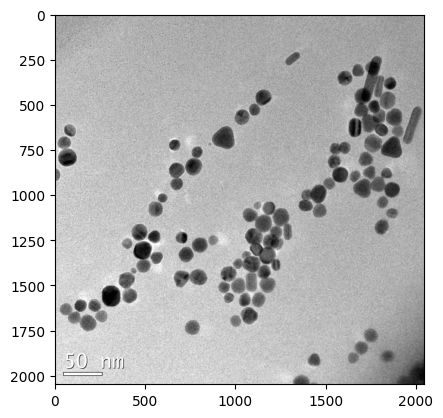

In [13]:
img = imread("./250201_AuNP_Kiran_Huat/A1_0/250201_AuNP_A1_0_6.jpg", as_gray=True)
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
plt.show()

In [14]:
# apply threshold
thresh = threshold_otsu(img)
bw = closing(img > thresh)

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_img = label(cleared)
regions = regionprops(label_img)

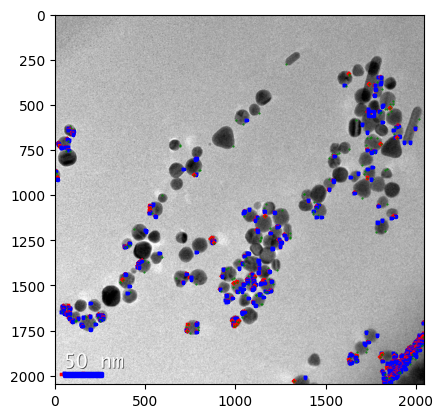

In [15]:
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=1)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

plt.show()

In [5]:
props.centroid

(0.0, 0.0, 1.0)